#1.Importing Library

In [240]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#2. Reading the data

In [242]:
df = pd.read_csv("/content/drive/MyDrive/Project_placement/Loan/loan_mine/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [243]:
print(df.shape)

(614, 13)


# 3. Data Exploration

The first type of variable that I will explore is categorical variable.
(1.Gender, 2.Married, 3.Education, 4.Self_Employed, 5.Credit History 6.Property_Area, 7.Loan_Status, 8.Loan Amount Term)

## 3.1 Categorical variables


## 3.1.1 Gender

In [244]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

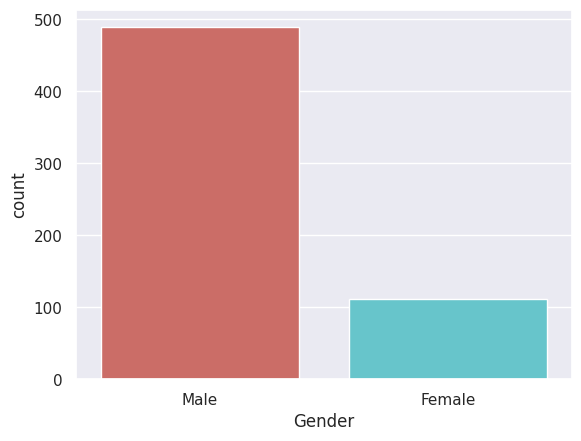

In [245]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [246]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Nan Values : {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Percentage of Nan Values : 2.12%


From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

##3.1.2 Married

In [247]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

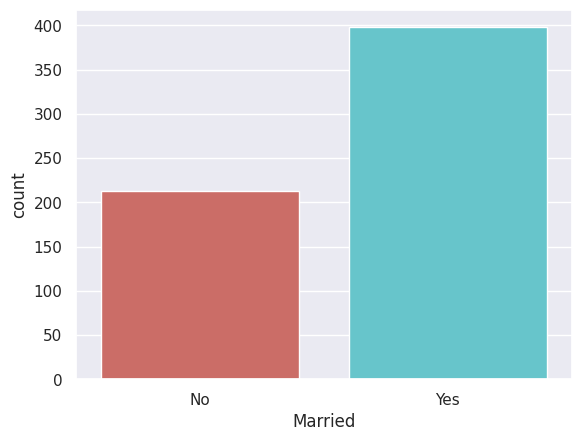

In [248]:
sns.countplot(x="Married", data=df, palette="hls")
plt.show()

In [249]:
countYes = len(df[df.Married == 'Yes'])
countNo = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countYes / (len(df.Married))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countNo / (len(df.Married))*100)))
print("Percentage of Nan Values : {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of Male applicant: 64.82%
Percentage of Female applicant: 34.69%
Percentage of Nan Values : 0.49%


From the results above, the number of married applicants is higher compared to unmarried applicants. It also can be seen there are missing values in this column.

##3.1.3 Education

In [250]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

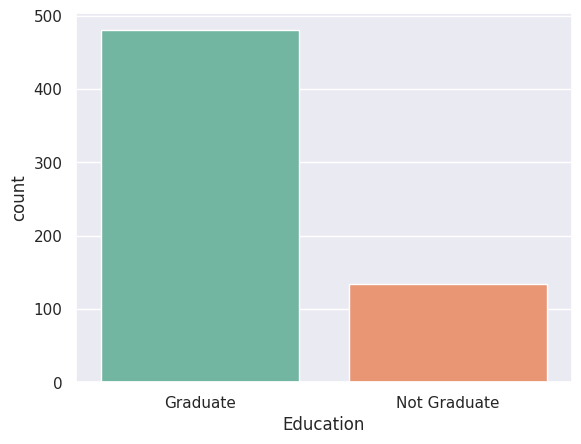

In [251]:
sns.countplot(x="Education", data=df, palette="Set2")
plt.show()

In [252]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

##3.1.4 Self Employed

In [253]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

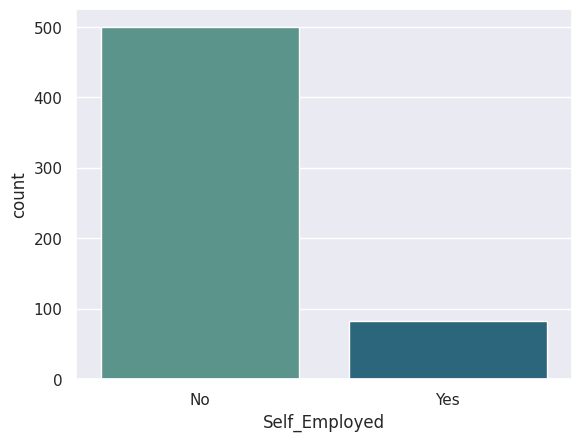

In [254]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [255]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

##3.1.5 Credit History

In [256]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

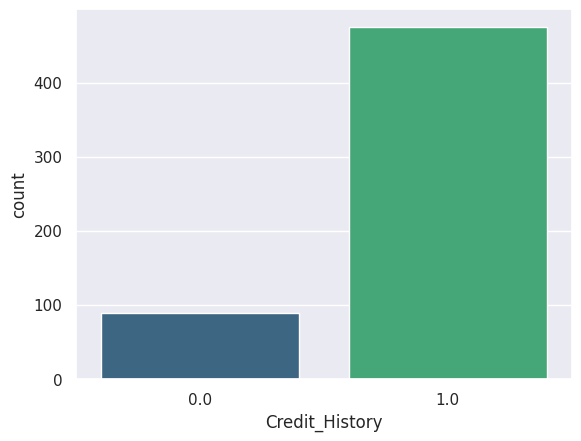

In [257]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [258]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

## 3.1.6  Property Area

In [259]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

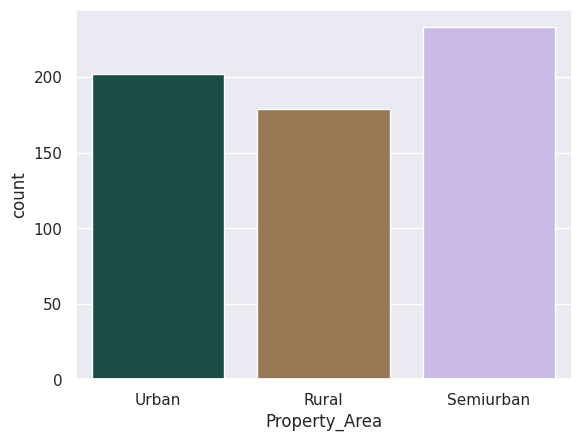

In [260]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [261]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

## 3.1.7  Loan Status

In [262]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

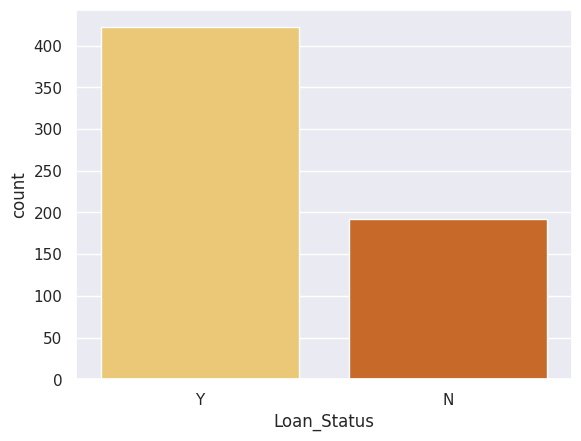

In [263]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [264]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

##3.1.8 Loan Amount Term

In [265]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

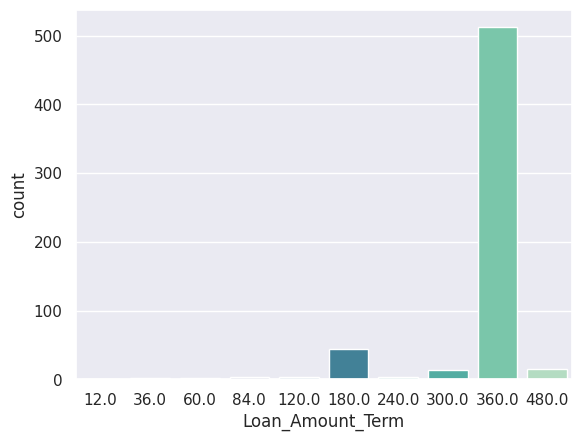

In [266]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="mako")
plt.show()

In [267]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


As can be seen from the results, the 360 days loan duration is the most popular compared to others

## 3.2 Numerical Variable

## 3.2.1  Describe Numerical Variable (1.ApplicantIncome 2.CoapplicantIncome 3.LoanAmount)

In [268]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [269]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


## 3.2.2 Distribution of Numerical Variable

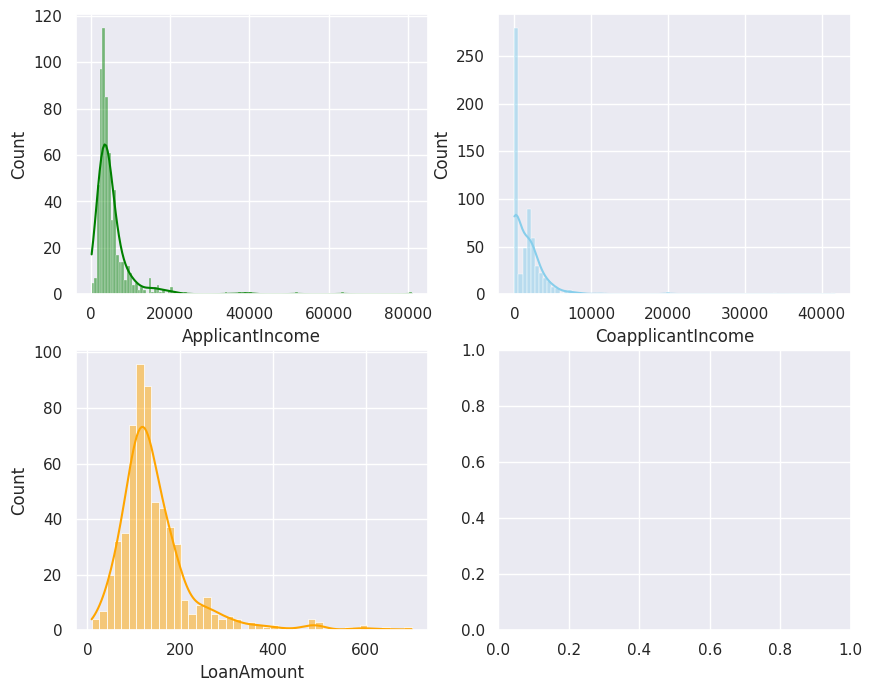

In [270]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


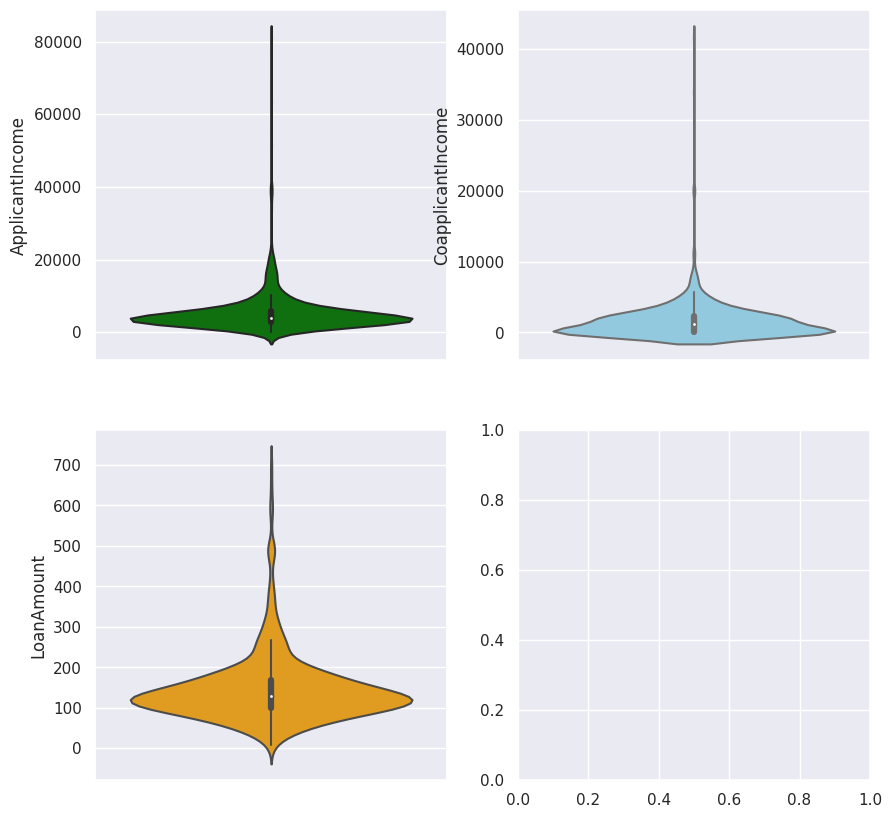

In [271]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).
The distribution of Loan Amount Term is negativly skewed and it has outliers.

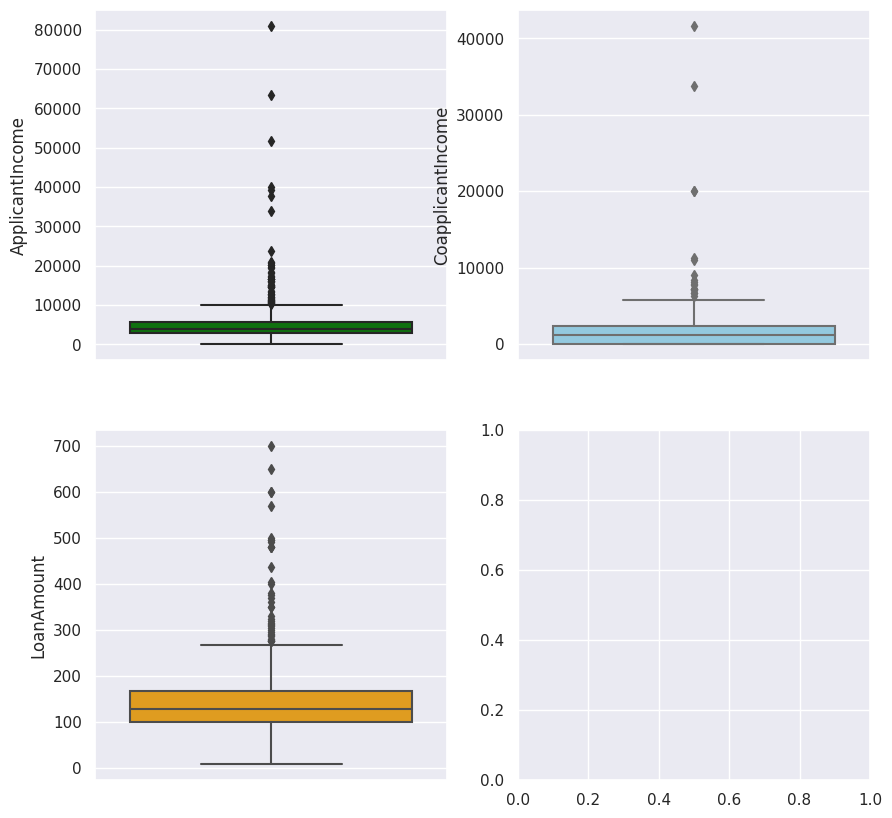

In [272]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

## 3.3 Other Exploration

## 3.3.1 Heatmap

<ipython-input-273-5ae8d32d347d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno');


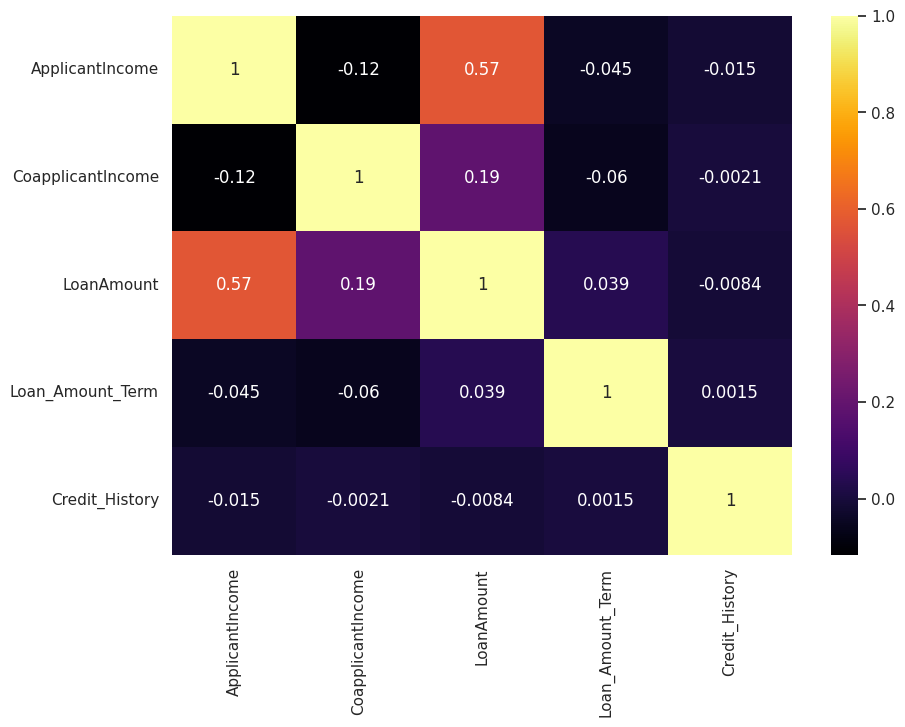

In [273]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

There is positive correlation between Loan Amount and Applicant Income

## 3.3.2 Categorical- Categorical

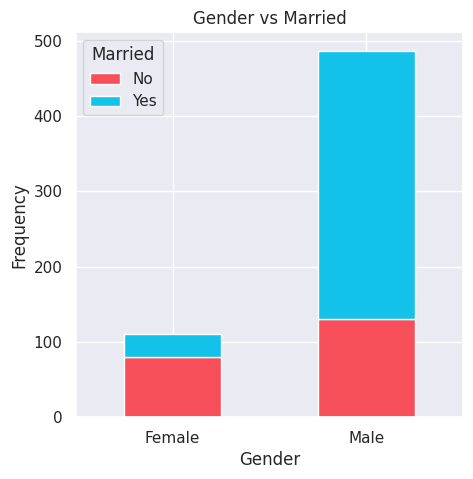

In [274]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

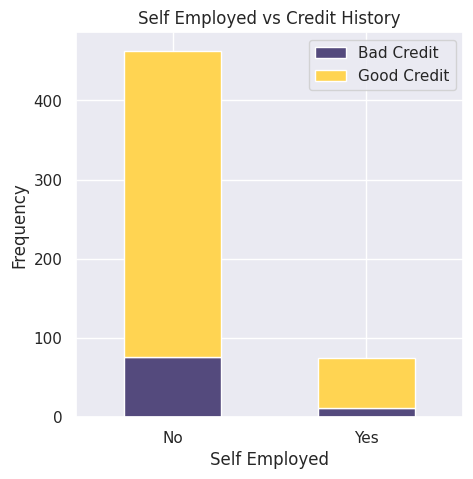

In [275]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants

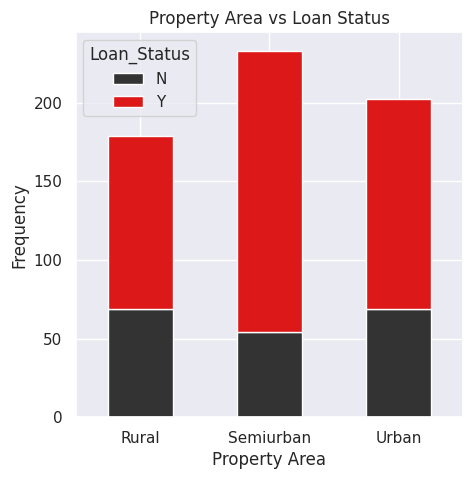

In [276]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

## 3.3.3 Categorical - Numerical

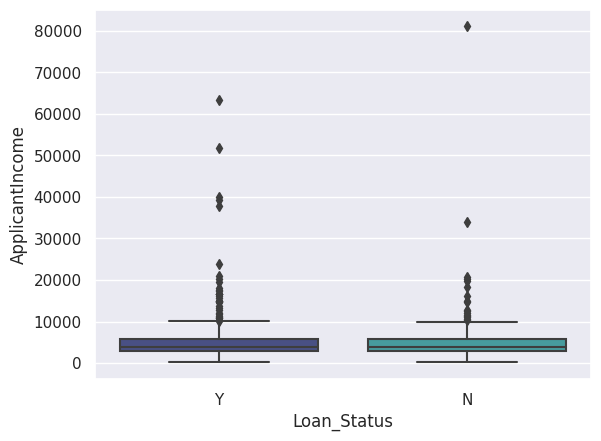

In [277]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

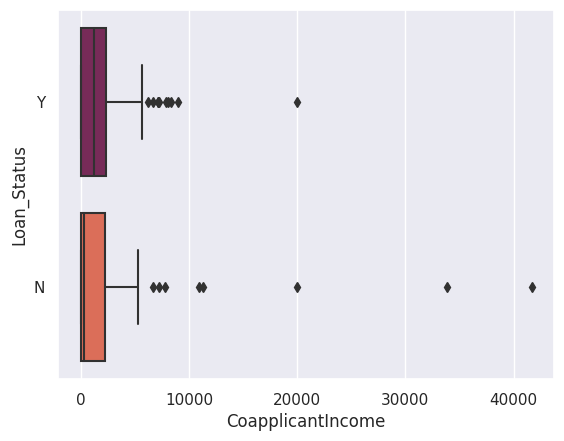

In [278]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

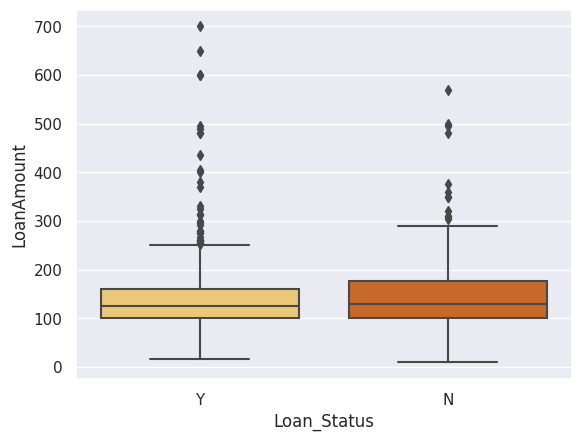

In [279]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

##3.3.4 Numerical - Numerical

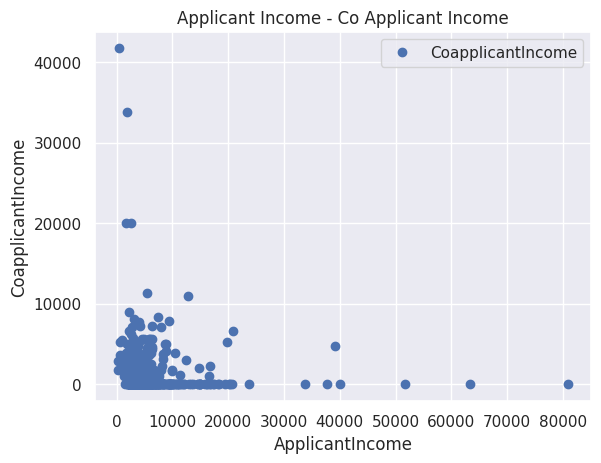

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [280]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

There is negative correlation between Applicant income and Co Applicant Income.
The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

# 4. Data Preprocessing

## 4.1 Drop Unecessary Variables

In [281]:
df = df.drop(['Loan_ID'], axis = 1)

## 4.2 Filling missing values

**Categorical variables**

Filling it by mode

Filling the missing data by mode of the respective columns (Gender, Married, Dependents, Self_Employed, Credit_History, Loan_Amount_Term)

In [282]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

**Numerical variables**

Filling it by mean

In [283]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

## 4.3 One-hot Encoding

Transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [284]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [285]:
df.shape

(614, 17)

In [286]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [287]:
df.shape

(353, 17)

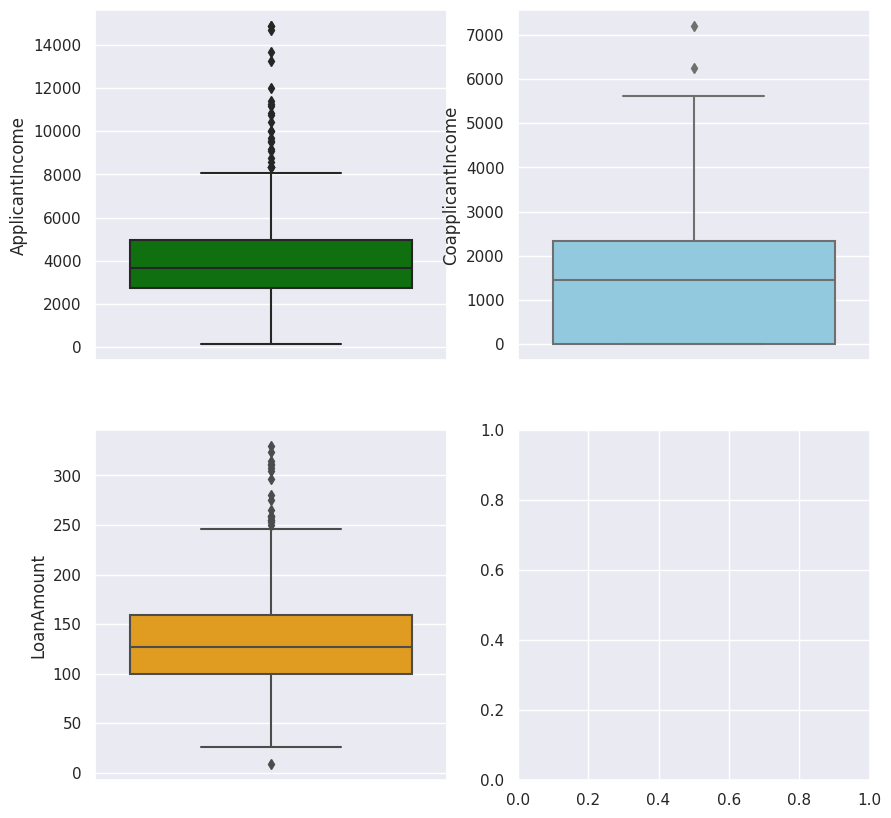

In [288]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

## 4.4 Skewed Distribution Treatment

 In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed
 using log transformation to normalized the distribution.

In [289]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)


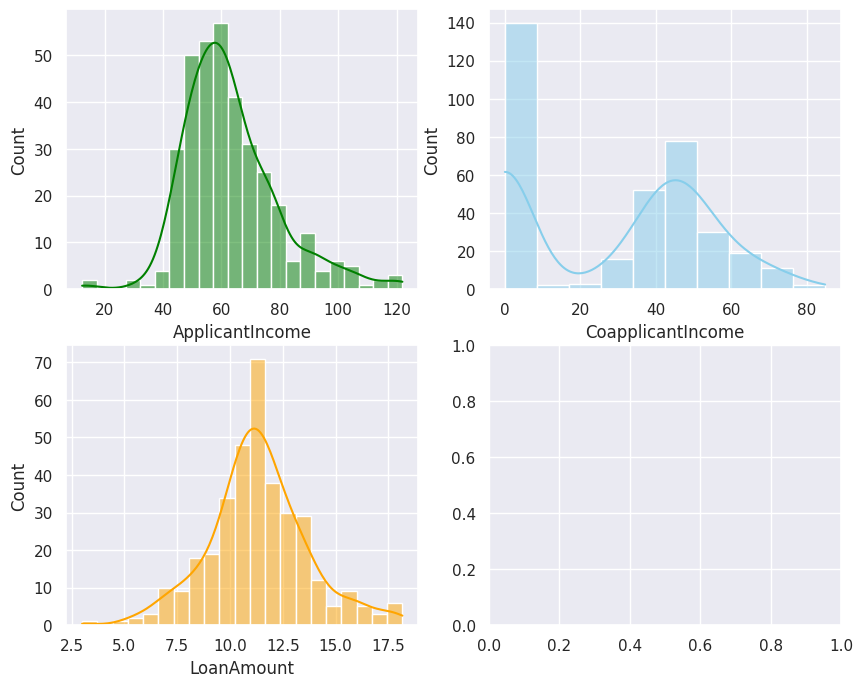

In [290]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

## 4.5 Features Separating

Dependent features (Loan_Status) will be seperated from independent features.

In [291]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
print(X.shape)
print(y.shape)

(353, 16)
(353,)


##4.6 SMOTE Technique

From previous section, It can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [292]:
X, y = SMOTE().fit_resample(X, y)

In [293]:
print(X.shape)
print(y.shape)

(570, 16)
(570,)


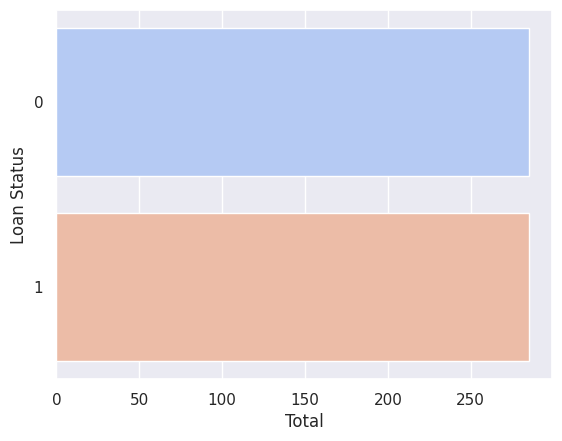

In [294]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

The distrubtion of Loan status are now balanced.

## 4.7 Splitting Data Set

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## 4.8 Data Normalization

In [296]:
minmaxscaler = MinMaxScaler()
X_train = pd.DataFrame(minmaxscaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(minmaxscaler.transform(X_test), columns= X_test.columns)

In [297]:
X_train.shape

(456, 16)

In [298]:
X_test.shape

(114, 16)

# 5.Models

In [299]:
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        57
           1       0.74      0.84      0.79        57

    accuracy                           0.77       114
   macro avg       0.78      0.77      0.77       114
weighted avg       0.78      0.77      0.77       114

[[40 17]
 [ 9 48]]
LR accuracy: 77.19%


In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Create a LogisticRegression instance
model = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1,1,10,20],         # Regularization parameter
    'penalty': ['elasticnet','l1','l2'],      # Regularization type
    'solver': ['saga'],
    'max_iter':[100,600,700]# Optimization algorithm
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test data using the best hyperparameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model of LR : {:.2f}%" .format(test_accuracy*100))



y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.7895365504061156
Test Accuracy with Best Model of LR : 78.07%
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        57
           1       0.73      0.89      0.80        57

    accuracy                           0.78       114
   macro avg       0.80      0.78      0.78       114
weighted avg       0.80      0.78      0.78       114

[[38 19]
 [ 6 51]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(ite

In [301]:
KNclassifier = KNeighborsClassifier()
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KnnAcc = accuracy_score(y_pred,y_test)
print('Knn accuracy: {:.2f}%'.format(KnnAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        57
           1       0.77      0.84      0.81        57

    accuracy                           0.80       114
   macro avg       0.80      0.80      0.80       114
weighted avg       0.80      0.80      0.80       114

[[43 14]
 [ 9 48]]
Knn accuracy: 79.82%


In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Create a KNeighborsClassifier instance
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [10,20,30,40],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['brute']
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')


# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test data using the best hyperparameters
best_knn_model = grid_search.best_estimator_
test_accuracy = best_knn_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

y_pred = best_knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Accuracy: 0.8266364070711896
Test Accuracy with Best Model: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        57
           1       0.88      0.91      0.90        57

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.89      0.89       114

[[50  7]
 [ 5 52]]


In [303]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73        57
           1       0.71      0.91      0.80        57

    accuracy                           0.77       114
   macro avg       0.80      0.77      0.77       114
weighted avg       0.80      0.77      0.77       114

[[36 21]
 [ 5 52]]
SVC accuracy: 77.19%


In [304]:
# scoreListDT = []
# for i in range(2,21):
#     DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
#     DTclassifier.fit(X_train, y_train)
#     scoreListDT.append(DTclassifier.score(X_test, y_test))
# plt.plot(range(2,21), scoreListDT)
# plt.xticks(np.arange(2,21,1))
# plt.xlabel("Leaf")
# plt.ylabel("Score")
# plt.show()
# DTAcc = max(scoreListDT)
# print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('DTAcc accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        57
           1       0.88      0.74      0.80        57

    accuracy                           0.82       114
   macro avg       0.82      0.82      0.81       114
weighted avg       0.82      0.82      0.81       114

[[51  6]
 [15 42]]
DTAcc accuracy: 81.58%


In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeClassifier instance
tree_model = DecisionTreeClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2, 4],
    'criterion': ['gini'],
    'max_leaf_nodes': [80,90,100,110]  # Including max_leaf_nodes
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test data using the best hyperparameters
best_tree_model = grid_search.best_estimator_
test_accuracy = best_tree_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

y_pred = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_leaf_nodes': 80, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8332537028189202
Test Accuracy with Best Model: 0.8245614035087719
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        57
           1       0.89      0.74      0.81        57

    accuracy                           0.82       114
   macro avg       0.83      0.82      0.82       114
weighted avg       0.83      0.82      0.82       114

[[52  5]
 [15 42]]


In [306]:
# scoreListRF = []
# for i in range(2,25):
#     RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
#     RFclassifier.fit(X_train, y_train)
#     scoreListRF.append(RFclassifier.score(X_test, y_test))

# plt.plot(range(2,25), scoreListRF)
# plt.xticks(np.arange(2,25,1))
# plt.xlabel("RF Value")
# plt.ylabel("Score")
# plt.show()
# RFAcc = max(scoreListRF)
# print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))



RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('RFAcc accuracy: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.91      0.84      0.87        57

    accuracy                           0.88       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.88      0.88      0.88       114

[[52  5]
 [ 9 48]]
RFAcc accuracy: 87.72%


In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeClassifier instance
RF_tree_model = RandomForestClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,40,60],
    'min_samples_split': [2,4,6,8,10],
    'max_features' : ['sqrt'] # Including max_leaf_nodes
}


# Create a GridSearchCV instance
grid_search = GridSearchCV(RF_tree_model, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test data using the best hyperparameters
best_tree_model = grid_search.best_estimator_
test_accuracy = best_tree_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

y_pred = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8573339703774486
Test Accuracy with Best Model: 0.8859649122807017
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.92      0.84      0.88        57

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

[[53  4]
 [ 9 48]]


In [308]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
best_rf_model = random_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Accuracy: 0.8529383659818441
Test Accuracy with Best Model: 0.8859649122807017
